# Bagged Tree

## Bagging (Bootstrap aggregation)

**Bootstrap**: To produce a bootstrap dataset, we randomly select observations from data set in order. The sampling is performed **with replacement**, which means that same observation can occur more than once in the bootstrap data set. Bootstrap is used to **quantify the uncertainty** associated with a given estimator or model. As a simple example, the bootstrap can be used to estimate the standard errors of the coefficients from a linear regression fit.


**Bootstrap aggregation**, or **bagging**, is a general-purpose procedure for reducing the variance of a statistical learning method, frequently used in the context of decision trees.


**Why bagging**

- A single decision trees suffer from high variance. A natural way to reduce the variance is to **take many training sets from the population**, build a separate prediction model using each training set, and average the resulting predictions. For example, recall that given a set of n independent observations Z1, ..., Zn, each with variance $σ^2$, the variance of the mean $\bar{Z}$ of the observations is given by $σ^2/n$.

- Hence, bagging has been demonstrated to give impressive improvements in accuracy of a statistical learning method by combining together hundreds or even thousands of trees into a single procedure. Therefore, bagging is frequently used especially in the context of decision trees.


**Process of Bagging**

1. Take B repeated samples of size N with replacement from a dataset of size N by bootstraping
2. We construct B trees using B bootstrapped data sets and get B predicted values
3. For the regression setting, average all the predictions value from these trees

\begin{align}
\hat{f}_{bag}(x)=\frac{1}{B}\sum_{b=1}^B\hat{f}^{*b}(x)
\end{align}


3. Or for the classification setting, for a given test observation, we can record the class predicted by each bootstrapped model, and take a majority vote: the overall prediction is the most commonly occurring majority class among those predictions.



**number of trees B**

The number of trees B is not a critical parameter with bagging: using a very large value of B will not lead to overfitting. In practice we use a value of B sufficiently large that the error has settled down. Using B = 100 is sufficient to achieve good performance in this example.

## Notes for OOB

We will now derive the probability that a given observation is part of a bootstrap sample. Suppose we obtain a bootstrap sample from a set of n observations.

**1. What is the probability that the first bootstrap observation is not the jth observation from the original sample? Justify your answer.**

Among all n observations, every observation has a $\frac{1}{n}$ probability to be chosen as the first bootstrap observation. So the probability that the jth observation is not the first bootstrap sample is: 

\begin{align}
1-\frac{1}{n}
\end{align}


**2. What is the probability that the second bootstrap observation is not the jth observation from the original sample?**

\begin{align}
1-\frac{1}{n}
\end{align}


**3. Argue that the probability that the jth observation is not in the n bootstrap sample is $(1-\frac{1}{n})^n$**

As we are using sampling with replacement to generate the bootstrap sample, the selection probabilities are independent. So,

Prob(Not 1st, Not 2nd, ..., Not the nth) = Prob(Not 1st) * Prob(Not 2nd) * … * Prob(Not nth) = $(1-\frac{1}{n})^n$


**4. When n = 5, what is the probability that the jth observation is in the 5 bootstrap sample?**

\begin{align}
1-(1-\frac{1}{n})^n = 1-(1-\frac{1}{5})^5 = 0.67232
\end{align}


**5. When n = 100, what is the probability that the jth observation is in the 100 bootstrap sample?**

\begin{align}
1-(1-\frac{1}{n})^n = 1-(1-\frac{1}{100})^{100} = 0.6339677
\end{align}


**6. When n = 10,000, what is the probability that the jth observation is in the 10,000 bootstrap sample?**

\begin{align}
1-(1-\frac{1}{n})^n = 1-(1-\frac{1}{10000})^{10000} = 0.632139
\end{align}


**7. Create a plot that displays, for each integer value of n from 1 to 100,000, the probability that the jth observation is in the bootstrap sample. Comment on what you observe.**

Text(0, 0.5, 'Probability that the j-th observation is in the bootstrap')

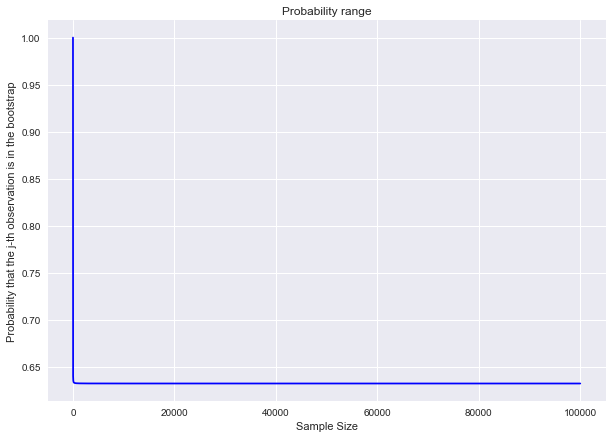

In [35]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

    
sample_sizes = range(1, 100001)

probability_sequence = [(1 - (1-1/n)**n) for n in sample_sizes]

plt.figure(figsize=(10, 7))
plt.plot(sample_sizes, probability_sequence, color='blue')
plt.title('Probability range')
plt.xlabel('Sample Size')
plt.ylabel('Probability that the j-th observation is in the bootstrap')

Clearly, the probabilities are converging to:

\begin{align}
\lim_{n \to \infty} [1 - (1-\frac{1}{n})^n]
\end{align}

Recall that:

\begin{align}
\lim_{n \to \infty} (1+\frac{x}{n})^n = e^x
\end{align}

So,

\begin{align}
\lim_{n \to \infty} [1 - (1-\frac{1}{n})^n] = \lim_{n \to \infty} [1 - (1+\frac{(-1)}{n})^n] = 1-e^{-1} = 0.632 \approx \frac{2}{3}
\end{align}

## Out-of-Bag Error Estimation

**A very straightforward way to estimate the test error of a bagged model, without cross-validation or the validation set**

- As we calculated before, if each time we draw N samples with replacement from a dataset of size N, approximately 2/3 of the dataset will be included in the bootstrapped dataset, which means that every bagged tree **makes use of around 2/3 the observations**. The remaining 1/3 of the observations not used to fit a given bagged tree are referred to as the **out-of-bag (OOB)** observations. We can **predict the response for those OOB observations** using each of the trees. 


- If we the number of trees we built is B. **For every observation, this will yield around B/3 predictions**. In order to obtain a single prediction for the ith observation, if regression, we can **average** these predicted responsesor can take a **majority** vote if classification is the goal.


- An OOB prediction can be obtained in this way for **each of the N observations**, from which the overall OOB MSE (for a regression problem) or classification error (for a classification problem) can be computed. The resulting OOB error is a valid estimate of the test error for the bagged model, since the response for each observation is predicted using only the trees that were not fit using that observation.


- The OOB approach for estimating the test error is particularly convenient when performing **bagging** on large data sets for which cross-validation would be computationally onerous.

## Variable Importance Measures 

**Bagging improves prediction accuracy at the expense of interpretability**

- When we bag a large number of trees, it is no longer possible to **represent the resulting statistical learning procedure using a single tree**


**Variable Importance**

- One can obtain an overall summary of the importance of each predictor using the RSS (for bagging regression trees) or the Gini index (for bagging classification trees).

- **For bagging regression trees**: Record the total amount that the RSS is decreased due to splits over a given predictor, averaged over all B trees. A large value indicates an important predictor. 

\begin{align}
RSS=\sum_{j=1}^J\sum_{i \in R_j} (y_i-\hat{y}_{R_j})^2
\end{align}

- **For bagging classification trees**: Add up the total amount that the **Gini index** is decreased
by splits over a given predictor, averaged over all B trees.

<img src="./images/92.png" width="600">

# Random Forests

Random forests provide an **improvement** over bagged trees by way of a small tweak that **decorrelates** the trees.


**Bagged trees**

- Suppose that there is one **very strong** predictor in the data set, along with a num- ber of other moderately strong predictors. Then in the collection of bagged trees, most or all of the trees will **use this strong predictor in the top split**.
- Consequently, all of the bagged trees will **look quite similar** to each other. Hence the predictions from the bagged trees will be **highly correlated**.
- Unfortunately, averaging many highly correlated quantities does not lead to as large of a reduction in variance as averaging many uncorrelated quantities. This means that bagging will **not lead to a substantial reduction in variance** over a single tree in this setting.


**Random forests**

Random forests overcome this problem by forcing each split to consider only a subset of the predictors.

- Each time a split in a tree is considered, **a random sample of m predictors** is chosen as split candidates from the full set of p predictors. The split is allowed to use only one of those **m** predictors. **A fresh sample** of m predictors is taken at each split, and typically we choose $m \approx \sqrt{p}$
- Therefore, on average (p − m)/p of the splits will not even consider the strong predictor, and so other predictors will have more of a chance. 
- We can think of this process as **decorrelating the trees**, thereby making the average of the **resulting trees less variable** and hence more reliable.


**Main difference**

The main difference between bagging and random forests is **the choice of predictor subset size m**. 
- If a random forest is built using m = p, then this amounts simply to bagging. 
-  Using a small value of m in building a random forest will typically be helpful when we have **a large number of correlated predictors (high-dimensional data)**.

# Boosting

**Boosting**: approach for improving the predictions resulting from a decision tree. Like bagging, boosting is a **general approach** that can be applied to many statistical learning methods for regression or classification. Here we talk about boosting in decision trees setting. 


**Bagging**

Each tree is built on a bootstrap data set, independent of the other trees.



**Boosting**

- Trees are grown **sequentially**: each tree is grown using information from previously grown trees. 
- Boosting does not involve bootstrap sampling; instead each tree is fit on a modified version of the original data set.


**Algorithm of Boosting for Regression Trees**

1. Set $\hat{f(x)}=0$ and $r_i = y_i$ for all i in the training set (predict 0 for all training observations and hence residual values euqal to their original response values)
2. For b=1, 2, ..., B (every dicision tree we build), repeat:
 - Fit a tree $\hat{fˆb}$ with d splits (d+1 terminal nodes) to the training data (X, r). That is, we fit a tree using the current residuals, rather than the outcome Y , as the response. 
 - Update $\hat{f}$ by adding in a shrunken version of the new tree. That is, we add this new decision tree into the fitted function in order to update the residuals.
\begin{align}
\hat{f}(x) \leftarrow \hat{f}(x) + \lambda\hat{f}^b(x)
\end{align}
 - Update the residuals
\begin{align}
r_i \leftarrow r_i \leftarrow \lambda\hat{f}^b(x_i)
\end{align}
3. Output the boosted model
\begin{align}
\hat{f}(x) = \sum_{b=1}^B\lambda\hat{f}^b(x)
\end{align}

By fitting small trees to the residuals, we slowly **improve f in areas where it does not perform well**. The shrinkage parameter λ slows the process down even further, allowing more and different shaped trees to attack the residuals.


**Boosting has three tuning parameters:**

1. The number of trees B. Unlike bagging and random forests, **boosting can overfit if B is too large**, although this overfitting tends to occur slowly if at all. We use cross-validation to select B.

2. The shrinkage parameter λ, a small positive number. This controls **the rate at which boosting learns**. Typical values are 0.01 or 0.001, and the right choice can depend on the problem. Very small λ can require using a very large value of B in order to achieve good performance.

3. The number d of splits in each tree, which controls the **complexity** of the boosted ensemble. Often d = 1 works well, in which case each tree is a stump, consisting of a single split. In this case, the boosted ensemble is fitting an additive model, since each term involves only a single variable. More generally d is the **interaction depth**, and controls the interaction order of the boosted model, since d splits can **involve at most d variables**.


**Boosting V.S. Random forests:**

- In boosting, because the growth of a particular tree **takes into account the other trees** that have already been grown, **smaller trees are typically sufficient**. 
- Using smaller trees can aid in **interpretability** as well; for instance, using **stumps** leads to an additive model.